### Exercise 2

In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
# 1000 samples of uniform distribution on interval [0, 1]
array1 = np.random.uniform(low=0.0, high=1.0, size=1000)

# 1000 samples of normal distribution with mean 0 and standard deviation 1
array2 = np.random.normal(loc=0.0, scale=1.0, size=1000)

# 1000 samples of normal distribution with mean 0 and standard deviation 10
array3 = np.random.normal(loc=0.0, scale=10.0, size=1000)

# 1000 samples of beta distribution for the parameters (1, 1); (2, 2); (3, 9)
array4 = np.random.beta(a=1, b=1, size=1000)
array5 = np.random.beta(a=2, b=2, size=1000)
array6 = np.random.beta(a=3, b=9, size=1000)

# 10000 samples of two-dimensional normal distributions each with mean (0, 0) and covariance matrices
cov7 = [[1, 0], [0, 1]]
cov8 = [[2, 1], [1, 2]]
array7 = np.random.multivariate_normal(mean=[0, 0], cov=cov7, size=(1, 5000))
array8 = np.random.multivariate_normal(mean=[0, 0], cov=cov8, size=(1, 5000))

### Exercise 3

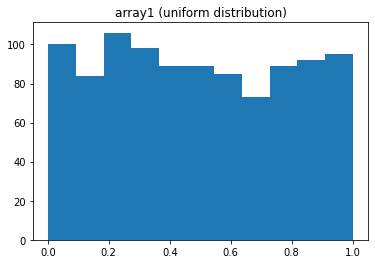

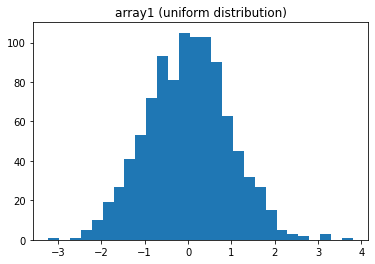

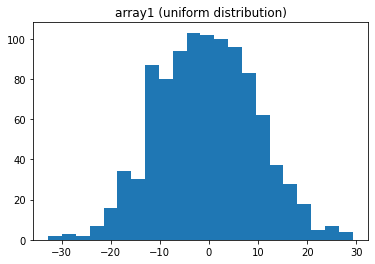

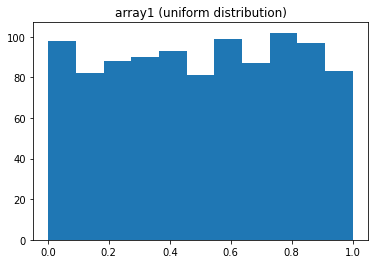

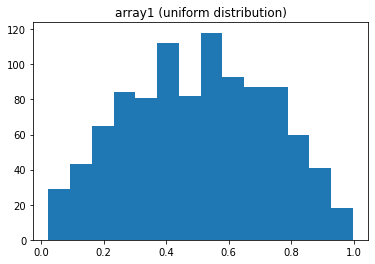

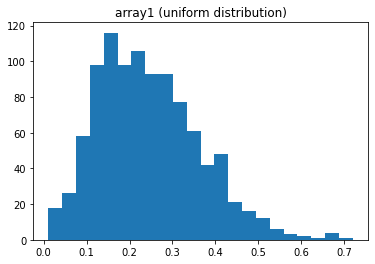

In [94]:
# Plot for 
plt.hist(array1, bins='auto')
plt.title("array1 (uniform distribution)")
plt.show()

plt.hist(array2, bins='auto')
plt.title("array1 (uniform distribution)")
plt.show()

plt.hist(array3, bins='auto')
plt.title("array1 (uniform distribution)")
plt.show()

plt.hist(array4, bins='auto')
plt.title("array1 (uniform distribution)")
plt.show()

plt.hist(array5, bins='auto')
plt.title("array1 (uniform distribution)")
plt.show()

plt.hist(array6, bins='auto')
plt.title("array1 (uniform distribution)")
plt.show()

(5000, 2)


IndexError: list index out of range

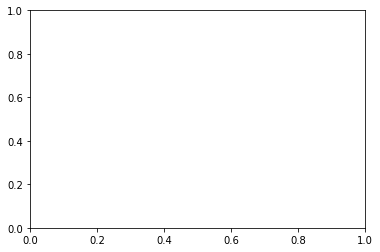

In [96]:
print(np.shape(array7[0]))
plt.hist2d(x=array7[0][0][0], y=array7[0][0][1])
plt.title("array7 (uniform distribution)")
plt.show()